<a href="https://colab.research.google.com/github/s97616s97616/s97616s97616/blob/master/Fubon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link = "https://drive.google.com/open?id=1w6-_5k6pCMvXzg3oECV4m3IGyxElZzxn" 
fluff, id = link.split('=')
print (id) 

1w6-_5k6pCMvXzg3oECV4m3IGyxElZzxn


In [3]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df_or = pd.read_csv('Filename.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [293]:
uniq = pd.Series(df_or["ncodpers"].unique())
unique_id = uniq.sample(n=2000)
df = df_or[df_or.ncodpers.isin(unique_id)]
df.shape

(28667, 48)

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [193]:
df.isna().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado                24
pais_residencia             24
sexo                        24
age                          0
fecha_alta                  24
ind_nuevo                   24
antiguedad                   0
indrel                      24
ult_fec_cli_1t           14292
indrel_1mes                148
tiprel_1mes                148
indresi                     24
indext                      24
conyuemp                 14325
canal_entrada              172
indfall                     24
tipodom                     24
cod_prov                   109
nomprov                    109
ind_actividad_cliente       24
renta                     2656
segmento                   183
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

In [194]:
df_ind=df[df["ind_empleado"].isnull()]
df_ind.isna().sum()

fecha_dato                0
ncodpers                  0
ind_empleado             24
pais_residencia          24
sexo                     24
age                       0
fecha_alta               24
ind_nuevo                24
antiguedad                0
indrel                   24
ult_fec_cli_1t           24
indrel_1mes              24
tiprel_1mes              24
indresi                  24
indext                   24
conyuemp                 24
canal_entrada            24
indfall                  24
tipodom                  24
cod_prov                 24
nomprov                  24
ind_actividad_cliente    24
renta                    24
segmento                 24
ind_ahor_fin_ult1         0
ind_aval_fin_ult1         0
ind_cco_fin_ult1          0
ind_cder_fin_ult1         0
ind_cno_fin_ult1          0
ind_ctju_fin_ult1         0
ind_ctma_fin_ult1         0
ind_ctop_fin_ult1         0
ind_ctpp_fin_ult1         0
ind_deco_fin_ult1         0
ind_deme_fin_ult1         0
ind_dela_fin_ult1   

In [195]:
df_1=df.dropna(subset=["ind_empleado"])
df_1.isna().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado                 0
pais_residencia              0
sexo                         0
age                          0
fecha_alta                   0
ind_nuevo                    0
antiguedad                   0
indrel                       0
ult_fec_cli_1t           14268
indrel_1mes                124
tiprel_1mes                124
indresi                      0
indext                       0
conyuemp                 14301
canal_entrada              148
indfall                      0
tipodom                      0
cod_prov                    85
nomprov                     85
ind_actividad_cliente        0
renta                     2632
segmento                   159
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

In [0]:
df_1.drop(["nomprov","tipodom","pais_residencia","fecha_alta","cod_prov","nomprov"],axis=1,inplace=True)
df_1["ult_fec_cli_1t"].fillna(1,inplace=True)
df_1["ult_fec_cli_1t"][df_1["ult_fec_cli_1t"]!=1]=0

In [197]:
df_1["sexo"].fillna("X",inplace=True)
df_1["sexo"].value_counts()

V    7617
H    6685
Name: sexo, dtype: int64

In [198]:
df_1["indrel_1mes"].fillna(5,inplace=True)
df_1["indrel_1mes"].replace("P",6,inplace=True)
df_1["indrel_1mes"]=df_1["indrel_1mes"].astype(float)
df_1["indrel_1mes"]=df_1["indrel_1mes"].astype(str)
df_1["indrel_1mes"].value_counts()

1.0    14171
5.0      124
3.0        7
Name: indrel_1mes, dtype: int64

In [199]:
df_1["tiprel_1mes"].fillna("X",inplace=True)
df_1["tiprel_1mes"].value_counts()

I    7477
A    6694
X     124
P       7
Name: tiprel_1mes, dtype: int64

In [200]:
df_1["conyuemp"].fillna("N",inplace=True)
df_1["conyuemp"].value_counts()

1    14301
N        1
Name: conyuemp, dtype: int64

In [201]:
df_1["canal_entrada"].fillna("X",inplace=True)
df_1["canal_entrada"].replace(df_1["canal_entrada"].value_counts().keys()[3:],"X",inplace=True)
df_1["canal_entrada"].value_counts()

KHE    4216
KAT    3559
X      3413
KFC    3114
Name: canal_entrada, dtype: int64

In [202]:
df_1["segmento"].fillna("X",inplace=True)
df_1["segmento"].value_counts()

02 - PARTICULARES     8312
03 - UNIVERSITARIO    5219
01 - TOP               612
X                      159
Name: segmento, dtype: int64

In [203]:
df_1["renta"].fillna(df_1["renta"].median(),inplace=True)
df_1["renta"].describe()

count    1.430200e+04
mean     1.279804e+05
std      1.081696e+05
min      1.211982e+04
25%      7.551561e+04
50%      1.029079e+05
75%      1.411875e+05
max      1.681628e+06
Name: renta, dtype: float64

In [204]:
df_1["ind_nomina_ult1"].fillna(0,inplace=True)
df_1["ind_nomina_ult1"].value_counts()

0.0    13518
1.0      784
Name: ind_nomina_ult1, dtype: int64

In [205]:
df_1["ind_nom_pens_ult1"].fillna(0,inplace=True)
df_1["ind_nom_pens_ult1"].value_counts()

0.0    13461
1.0      841
Name: ind_nom_pens_ult1, dtype: int64

In [206]:
df_1["month"] = pd.DatetimeIndex(df_1["fecha_dato"]).month
df_1["month"].value_counts()

5     1634
4     1627
3     1621
2     1618
1     1610
12     959
11     957
10     942
9      919
8      885
7      867
6      663
Name: month, dtype: int64

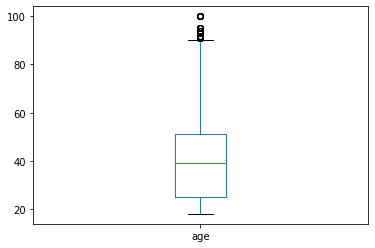

In [207]:
df_1["age"] = pd.to_numeric(df["age"], errors="coerce")
df_1.loc[df_1.age < 18,"age"]=18
df_1.loc[df_1.age > 100,"age"]=100
df_1["age"].plot(kind="box")

In [208]:
df_1["antiguedad"] = pd.to_numeric(df["antiguedad"], errors="coerce")
df_1.loc[df_1.antiguedad <= 0,"antiguedad"]=0
df_1["antiguedad"].describe()

count    14302.000000
mean        79.593204
std         65.954758
min          0.000000
25%         23.000000
50%         52.000000
75%        135.000000
max        248.000000
Name: antiguedad, dtype: float64

In [209]:
df_1["time"]=(pd.DatetimeIndex(df_1["fecha_dato"]).year-2015)*12+pd.DatetimeIndex(df_1["fecha_dato"]).month
df_1["time"].describe()

count    14302.000000
mean         9.726192
std          4.762008
min          1.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         17.000000
Name: time, dtype: float64

In [210]:
target_cols_all = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
               'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
               'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
               'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
               'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
               'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
               'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
               'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
df_1["prosum"]=df_1[target_cols_all].sum(1)
df_1["prosum"].describe()

count    14302.000000
mean         1.502377
std          1.526436
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: prosum, dtype: float64

In [211]:
df_1.head()

,fecha_dato,ncodpers,ind_empleado,sexo,age,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month,time,prosum
797,2015-01-28,1052310,N,H,22.0,0.0,35.0,1.0,1,1.0,A,S,N,1,KHE,N,1.0,130172.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,1,1.0
1616,2015-01-28,1048502,N,H,23.0,0.0,35.0,1.0,1,1.0,I,S,N,1,KHE,N,1.0,128795.10,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,1,1.0
3251,2015-01-28,1057205,N,V,23.0,0.0,34.0,1.0,1,1.0,A,S,N,1,KHE,N,1.0,230813.19,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,1,1.0
3566,2015-01-28,1056731,N,H,23.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,0.0,90900.63,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,1,1.0
4142,2015-01-28,1052858,N,V,38.0,0.0,35.0,1.0,1,1.0,I,S,N,1,KFC,N,1.0,50359.17,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,1,1.0


In [212]:
df_1.shape

(14302, 46)

In [213]:
import numpy as np

np1=np.zeros(24)
for k in range(2,18):
  df_temp=df_1[df_1["time"]==(k-1)]
  df_ex=df_1[df_1["time"]==k]
  for i in range(len(df_ex["ncodpers"])):
    np2=np.zeros(24)
    for j in range(len(df_temp["ncodpers"])):
      if(df_ex.iloc[i,1]==df_temp.iloc[j,1]):
        np2=np.array(df_ex.iloc[i,19:43])-np.array(df_temp.iloc[j,19:43])
        break
    np1=np.row_stack((np1,np2))

df_add=pd.DataFrame(np1)
df_add.drop(0,axis=0,inplace=True)
df_add.reset_index(drop=True,inplace=True)
df_add.columns=target_cols_all
df_add.astype(float)
df_add.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [214]:
df_add.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [215]:
df_1=df_1[df_1["time"]>1]
df_1.shape

(13650, 46)

In [216]:
df_1.head()

,fecha_dato,ncodpers,ind_empleado,sexo,age,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month,time,prosum
627359,2015-02-28,547014,N,H,66.0,0.0,119.0,1.0,1,1.0,A,S,N,1,KFC,N,1.0,102907.95,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0,2,2,2.0
628003,2015-02-28,538284,N,H,55.0,0.0,121.0,1.0,1,1.0,A,S,N,1,KFC,N,1.0,109833.00,02 - PARTICULARES,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1.0,1.0,1,2,2,7.0
628138,2015-02-28,537553,N,H,18.0,0.0,121.0,1.0,1,1.0,I,S,N,1,KFC,N,0.0,82337.43,02 - PARTICULARES,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2,2,1.0
628323,2015-02-28,539050,N,V,64.0,0.0,121.0,1.0,1,1.0,I,S,N,1,X,N,0.0,174335.43,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2,2,1.0
628555,2015-02-28,536312,N,V,18.0,0.0,115.0,1.0,1,1.0,A,S,N,1,KAT,N,1.0,87179.10,02 - PARTICULARES,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2,2,1.0


In [217]:
df_1.drop(target_cols_all,axis=1,inplace=True)
df_1.reset_index(drop=True,inplace=True)
df_1=pd.concat([df_1,df_add],axis=1)
df_1["newbuy"]=df_1[target_cols_all].sum(1)
print(df_1.shape)
df_1["newbuy"].describe()

(13650, 47)


count    13650.000000
mean         0.003370
std          0.338923
min         -4.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: newbuy, dtype: float64

In [218]:
df_1.head()

,fecha_dato,ncodpers,ind_empleado,sexo,age,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,ind_actividad_cliente,renta,segmento,month,time,prosum,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,newbuy
0,2015-02-28,547014,N,H,66.0,0.0,119.0,1.0,1,1.0,A,S,N,1,KFC,N,1.0,102907.95,02 - PARTICULARES,2,2,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
1,2015-02-28,538284,N,H,55.0,0.0,121.0,1.0,1,1.0,A,S,N,1,KFC,N,1.0,109833.00,02 - PARTICULARES,2,2,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,2015-02-28,537553,N,H,18.0,0.0,121.0,1.0,1,1.0,I,S,N,1,KFC,N,0.0,82337.43,02 - PARTICULARES,2,2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,2015-02-28,539050,N,V,64.0,0.0,121.0,1.0,1,1.0,I,S,N,1,X,N,0.0,174335.43,02 - PARTICULARES,2,2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,2015-02-28,536312,N,V,18.0,0.0,115.0,1.0,1,1.0,A,S,N,1,KAT,N,1.0,87179.10,02 - PARTICULARES,2,2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [219]:
df_tr=df_1[df_1["time"]>4]
df_tr.shape

(11678, 47)

In [0]:
df_1[target_cols_all]=df_1[target_cols_all].astype(int)

In [231]:
df_g=df_1.groupby('time').sum()[target_cols_all]
df_g.columns=["last"+i for i in target_cols_all]
df_g=df_g[2:15]
df_g.reset_index(inplace=True)
df_g["time"]=df_g["time"]+1
df_com=df_tr.merge(df_g,how="left", left_on='time', right_on='time')
print(df_com.shape)
df_com.head()

(11678, 71)


,fecha_dato,ncodpers,ind_empleado,sexo,age,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,ind_actividad_cliente,renta,segmento,month,time,prosum,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,newbuy,lastind_ahor_fin_ult1,lastind_aval_fin_ult1,lastind_cco_fin_ult1,lastind_cder_fin_ult1,lastind_cno_fin_ult1,lastind_ctju_fin_ult1,lastind_ctma_fin_ult1,lastind_ctop_fin_ult1,lastind_ctpp_fin_ult1,lastind_deco_fin_ult1,lastind_deme_fin_ult1,lastind_dela_fin_ult1,lastind_ecue_fin_ult1,lastind_fond_fin_ult1,lastind_hip_fin_ult1,lastind_plan_fin_ult1,lastind_pres_fin_ult1,lastind_reca_fin_ult1,lastind_tjcr_fin_ult1,lastind_valo_fin_ult1,lastind_viv_fin_ult1,lastind_nomina_ult1,lastind_nom_pens_ult1,lastind_recibo_ult1
0,2015-05-28,1061937,N,H,23.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,0.0,84094.47,03 - UNIVERSITARIO,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2
1,2015-05-28,1060380,N,V,24.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,1.0,61608.63,03 - UNIVERSITARIO,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2
2,2015-05-28,1064341,N,H,26.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,0.0,102907.95,03 - UNIVERSITARIO,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2
3,2015-05-28,1064211,N,H,30.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,0.0,102907.95,03 - UNIVERSITARIO,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2
4,2015-05-28,1065185,N,V,23.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,0.0,169159.65,03 - UNIVERSITARIO,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2


In [252]:
df_com.head()

,fecha_dato,ncodpers,ind_empleado,sexo,age,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,ind_actividad_cliente,renta,segmento,month,time,prosum,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,newbuy,lastind_ahor_fin_ult1,lastind_aval_fin_ult1,lastind_cco_fin_ult1,lastind_cder_fin_ult1,lastind_cno_fin_ult1,lastind_ctju_fin_ult1,lastind_ctma_fin_ult1,lastind_ctop_fin_ult1,lastind_ctpp_fin_ult1,lastind_deco_fin_ult1,lastind_deme_fin_ult1,lastind_dela_fin_ult1,lastind_ecue_fin_ult1,lastind_fond_fin_ult1,lastind_hip_fin_ult1,lastind_plan_fin_ult1,lastind_pres_fin_ult1,lastind_reca_fin_ult1,lastind_tjcr_fin_ult1,lastind_valo_fin_ult1,lastind_viv_fin_ult1,lastind_nomina_ult1,lastind_nom_pens_ult1,lastind_recibo_ult1
0,2015-05-28,1061937,N,H,23.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,0.0,84094.47,03 - UNIVERSITARIO,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2
1,2015-05-28,1060380,N,V,24.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,1.0,61608.63,03 - UNIVERSITARIO,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2
2,2015-05-28,1064341,N,H,26.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,0.0,102907.95,03 - UNIVERSITARIO,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2
3,2015-05-28,1064211,N,H,30.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,0.0,102907.95,03 - UNIVERSITARIO,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2
4,2015-05-28,1065185,N,V,23.0,0.0,34.0,1.0,1,1.0,I,S,N,1,KHE,N,0.0,169159.65,03 - UNIVERSITARIO,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2


In [255]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

one_hot_list=["ind_empleado", "sexo", "indrel", "indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","segmento"]
df_tr[one_hot_list]=df_tr[one_hot_list].astype(str)
lab_encoder = LabelEncoder()
for i in one_hot_list:
  df_tr[i]=lab_encoder.fit_transform(df_tr[i])

one_hot = OneHotEncoder(categories="auto",drop="first")
cat_to_onehot = pd.DataFrame(one_hot.fit_transform(df_tr[one_hot_list]).toarray())
cat_to_onehot.columns=one_hot.get_feature_names()

df_com.drop(one_hot_list,axis=1,inplace=True)
df_com=pd.concat([df_com,cat_to_onehot],axis=1)
df_com.head()



,fecha_dato,ncodpers,age,ind_nuevo,antiguedad,ult_fec_cli_1t,ind_actividad_cliente,renta,month,time,prosum,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,newbuy,lastind_ahor_fin_ult1,lastind_aval_fin_ult1,lastind_cco_fin_ult1,lastind_cder_fin_ult1,lastind_cno_fin_ult1,lastind_ctju_fin_ult1,lastind_ctma_fin_ult1,lastind_ctop_fin_ult1,lastind_ctpp_fin_ult1,lastind_deco_fin_ult1,lastind_deme_fin_ult1,lastind_dela_fin_ult1,lastind_ecue_fin_ult1,lastind_fond_fin_ult1,lastind_hip_fin_ult1,lastind_plan_fin_ult1,lastind_pres_fin_ult1,lastind_reca_fin_ult1,lastind_tjcr_fin_ult1,lastind_valo_fin_ult1,lastind_viv_fin_ult1,lastind_nomina_ult1,lastind_nom_pens_ult1,lastind_recibo_ult1,x0_1,x1_1,x2_1,x3_1,x3_2,x4_1,x4_2,x4_3,x5_1,x6_1,x7_1,x8_1,x8_2,x8_3,x9_1,x10_1,x10_2,x10_3
0,2015-05-28,1061937,23.0,0.0,34.0,1,0.0,84094.47,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2015-05-28,1060380,24.0,0.0,34.0,1,1.0,61608.63,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2015-05-28,1064341,26.0,0.0,34.0,1,0.0,102907.95,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2015-05-28,1064211,30.0,0.0,34.0,1,0.0,102907.95,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2015-05-28,1065185,23.0,0.0,34.0,1,0.0,169159.65,5,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,-1,-3,0,0,0,-1,-1,0,0,0,0,1,4,0,0,-3,0,2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [290]:
cat_to_onehot.shape

(11678, 18)

In [265]:
"""
index=list(df_tr.columns)
time=index.index("time")
ncodpers=index.index("ncodpers")
newbuy=index.index("newbuy")
tlist=[]
for i in range(len(df_tr["ncodpers"])):
  temp=0
  for j in range(len(df_1["ncodpers"])):
    if(df_tr.iloc[i,time]==df_1.iloc[j,time]):
      break
    if(df_tr.iloc[i,ncodpers]==df_1.iloc[j,ncodpers]):
      if(df_1.iloc[j,newbuy]>0):
        temp=df_tr.iloc[i,time]-df_1.iloc[j,time]
      else:
        temp=0
  tlist.append(temp)
lastbuy=pd.DataFrame(tlist)
lastbuy.columns=["lastbuytime"]
"""

KeyboardInterrupt: ignored

In [0]:
np1=np.zeros(24)
for k in range(5,18):
  df_temp=df_1[df_1["time"]==(k-1)]
  df_ex=df_1[df_1["time"]==k]
  for i in range(len(df_ex["ncodpers"])):
    np2=np.zeros(24)
    for j in range(len(df_temp["ncodpers"])):
      if(df_ex.iloc[i,1]==df_temp.iloc[j,1]):
        np2=np.array(df_temp.iloc[j,19:43])
        break
    np1=np.row_stack((np1,np2))

df_np=pd.DataFrame(np1)
df_np.drop(0,axis=0,inplace=True)
df_np.reset_index(drop=True,inplace=True)
df_np.columns=["t-1_"+str(i) for i in range(24)]

In [0]:
np1=np.zeros(24)
for k in range(5,18):
  df_temp=df_1[df_1["time"]==(k-2)]
  df_ex=df_1[df_1["time"]==k]
  for i in range(len(df_ex["ncodpers"])):
    np2=np.zeros(24)
    for j in range(len(df_temp["ncodpers"])):
      if(df_ex.iloc[i,1]==df_temp.iloc[j,1]):
        np2=np.array(df_temp.iloc[j,19:43])
        break
    np1=np.row_stack((np1,np2))

df_np2=pd.DataFrame(np1)
df_np2.drop(0,axis=0,inplace=True)
df_np2.reset_index(drop=True,inplace=True)
df_np2.columns=["t-2_"+str(i) for i in range(24)]

In [0]:
np1=np.zeros(24)
for k in range(5,18):
  df_temp=df_1[df_1["time"]==(k-3)]
  df_ex=df_1[df_1["time"]==k]
  for i in range(len(df_ex["ncodpers"])):
    np2=np.zeros(24)
    for j in range(len(df_temp["ncodpers"])):
      if(df_ex.iloc[i,1]==df_temp.iloc[j,1]):
        np2=np.array(df_temp.iloc[j,19:43])
        break
    np1=np.row_stack((np1,np2))

df_np3=pd.DataFrame(np1)
df_np3.drop(0,axis=0,inplace=True)
df_np3.reset_index(drop=True,inplace=True)
df_np3.columns=["t-3_"+str(i) for i in range(24)]

In [0]:
df_com=pd.concat([df_com,df_np,df_np2,df_np3],axis=1)
df_com.drop(["fecha_dato","ncodpers","prosum"],axis=1,inplace=True)

In [0]:
df_test=df_com[df_com["time"]==17]
y_test=df_test[target_cols_all]
df_test.drop(target_cols_all,axis=1,inplace=True)

df_train=df_com[df_com["time"]<16]
y_train=df_train[target_cols_all]
df_train.drop(target_cols_all,axis=1,inplace=True)

df_val=df_com[df_com["time"]==16]
y_val=df_val[target_cols_all]
df_val.drop(target_cols_all,axis=1,inplace=True)

df_last=df_com[df_com["time"]<17]
y_last=df_last[target_cols_all]
df_last.drop(target_cols_all,axis=1,inplace=True)

In [276]:
print(df_train.shape)
print(df_val.shape)
print(df_last.shape)
print(df_test.shape)

(9742, 123)
(966, 123)
(10708, 123)
(970, 123)


In [0]:
del df_com,df_1,df_tr

In [291]:
y_train.mean()

ind_ahor_fin_ult1    0.000000
ind_aval_fin_ult1    0.000000
ind_cco_fin_ult1     0.006467
ind_cder_fin_ult1    0.000000
ind_cno_fin_ult1     0.002772
ind_ctju_fin_ult1    0.000000
ind_ctma_fin_ult1    0.001232
ind_ctop_fin_ult1    0.000719
ind_ctpp_fin_ult1    0.000308
ind_deco_fin_ult1    0.000308
ind_deme_fin_ult1    0.000103
ind_dela_fin_ult1    0.001129
ind_ecue_fin_ult1    0.002669
ind_fond_fin_ult1    0.000205
ind_hip_fin_ult1     0.000000
ind_plan_fin_ult1    0.000000
ind_pres_fin_ult1    0.000000
ind_reca_fin_ult1    0.001129
ind_tjcr_fin_ult1    0.005030
ind_valo_fin_ult1    0.000308
ind_viv_fin_ult1     0.000000
ind_nomina_ult1      0.007288
ind_nom_pens_ult1    0.007904
ind_recibo_ult1      0.011291
dtype: float64

In [0]:
def metrics(pred,y_test):
  pred=pd.DataFrame(pred)
  tp_fp=pred.sum(1)
  tplist=[]
  for i in range(len(pred)):
    count=0
    for j in range(len(pred.columns)):
      if(pred.iloc[i,j]==1 and y_test.iloc[i,j]==1):
        count+=1
    tplist.append(count)
  div=[]
  tplist=pd.Series(tplist)
  for i in range(len(tplist)):
    if(tp_fp[i]==0):
      prec=0
    else:
      prec=tplist[i]/tp_fp[i]
    div.append(prec)
  div=pd.Series(div)
  prec=div.mean()
  return prec

In [286]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

df_train=df_train.astype(float)
df_test=df_test.astype(float)
df_val=df_val.astype(float)
df_last=df_last.astype(float)
y_train=y_train.astype(float)
y_test=y_test.astype(float)
y_val=y_val.astype(float)
y_last=y_last.astype(float)
y_train.replace(-1,0,inplace=True)
y_test.replace(-1,0,inplace=True)
y_val.replace(-1,0,inplace=True)
y_last.replace(-1,0,inplace=True)

learning_rate=[0.2,0.3,0.4]
max_depth=[6,7,5]
gamma=[0,10,100]
scorelist=[]

for i in learning_rate:
  for j in max_depth:
    for k in gamma:
      clf = OneVsRestClassifier(XGBClassifier(learning_rate=i,max_depth=j,gamma=k))
      clf.fit(df_train,y_train)
      pred=clf.predict(df_val)
      scorelist.append(metrics(pred,y_val))

print(scorelist.index(max(scorelist)))

0


In [0]:
from sklearn.linear_model import LogisticRegression

tol=[1e-4,1e-3,1e-5]
C=[1,2]
scorelist=[]

for i in tol:
  for j in C:
    clf = OneVsRestClassifier(LogisticRegression(tol=i,C=j))
    clf.fit(df_train,y_train)
    pred=clf.predict(df_val)
    scorelist.append(metrics(pred,y_val))

print(scorelist.index(max(scorelist)))

In [0]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

n_estimators=[50,100,150]
scorelist=[]

for i in n_estimators:
  clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=i))
  clf.fit(df_train,y_train)
  pred=clf.predict(df_val)
  scorelist.append(metrics(pred,y_val))

print(scorelist.index(max(scorelist)))

In [0]:
def vote():
    clf1 = xgb.XGBClassifier(learning_rate=0.4,max_depth=7,gamma=0)
    clf2 = RandomForestClassifier(n_estimators=150)
    clf3 = LogisticRegression()
    eclf = VotingClassifier(estimators=[('1', clf1), ('2', clf2), ('3', clf3)])
    eclf.fit(df_last,y_last)
    pred=clf.predict(y_test)
    print(metrics(pred,y_test))

    